# 0.0 Imports

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import inflection

from matplotlib import pyplot as plt
from IPython.core.display import HTML
import matplotlib.patches as mpatches



# Help Funcions

In [68]:
 def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

jupyter_settings() 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 0.1 Loading Dataset

In [6]:
df_raw = pd.read_csv('/Users/franciscocaetano/Documents/Data Science/Health_Insurance_Cross_Sell/health_insurance_cross_sell/data/train.csv')

In [7]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0 Data Description

In [9]:
df1 = df_raw.copy()

In [10]:
cols = ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']

# transform to lower case 
df1.columns = cols

In [11]:
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 1.1 Data dimention

In [15]:
print('Num of rows: {}'.format(df1.shape[0]))
print('Num of cols: {}'.format(df1.shape[1]))


Num of rows: 381109
Num of cols: 12


## 1.2 Data type

In [16]:
df_raw.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## 1.3 Check Nas

In [18]:
df1.isnull().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.4 Data descreptive

In [22]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes= df1.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]'])

In [29]:
# central tendency
mean_ = pd.DataFrame(num_attributes.apply(np.mean)).T
median_ = pd.DataFrame(num_attributes.apply(np.median)).T


# dispersion
std_ = pd.DataFrame(num_attributes.apply(np.std)).T
min_ = pd.DataFrame(num_attributes.apply(min)).T
max_ = pd.DataFrame(num_attributes.apply(max)).T
range_ = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
skew_  = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
kurtosis_ = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concat variabels

m = pd.concat([min_, max_, range_, mean_, median_, std_, skew_, kurtosis_]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

''''

*** DICTIONARY VARS ****
driving_license : If have or not drive licence
region_code : number of code region
previously_insured : if person previously have. insurance with the company
annual_premium : how much pereson payed annual services insurance
policy_sales_channel : code to indicate the channel preference to contact customer 
vintage: how long customer has been in the company *(days) 
response: people interested in the new service, yes or not (0, or 1) by email research
'''


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0 Feature Engineering

In [30]:
df2 = df1.copy()

In [40]:
# vehicle_age
df2['vehicle_age'] = df2['vehicle_age'] .apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' 
                                                                        if x == '1-2 Year' else 'less_than_1_year')
# demage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

In [41]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,over_2_years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,between_1_2_year,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,over_2_years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,less_than_1_year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,less_than_1_year,0,27496.0,152.0,39,0


# 3.0 Data Filtering

In [42]:
df3 = df2.copy()

# 4.0 EDA

In [43]:
df4 = df3.copy()

## 4.1 Univariate Analysis

<Axes: xlabel='response', ylabel='age'>

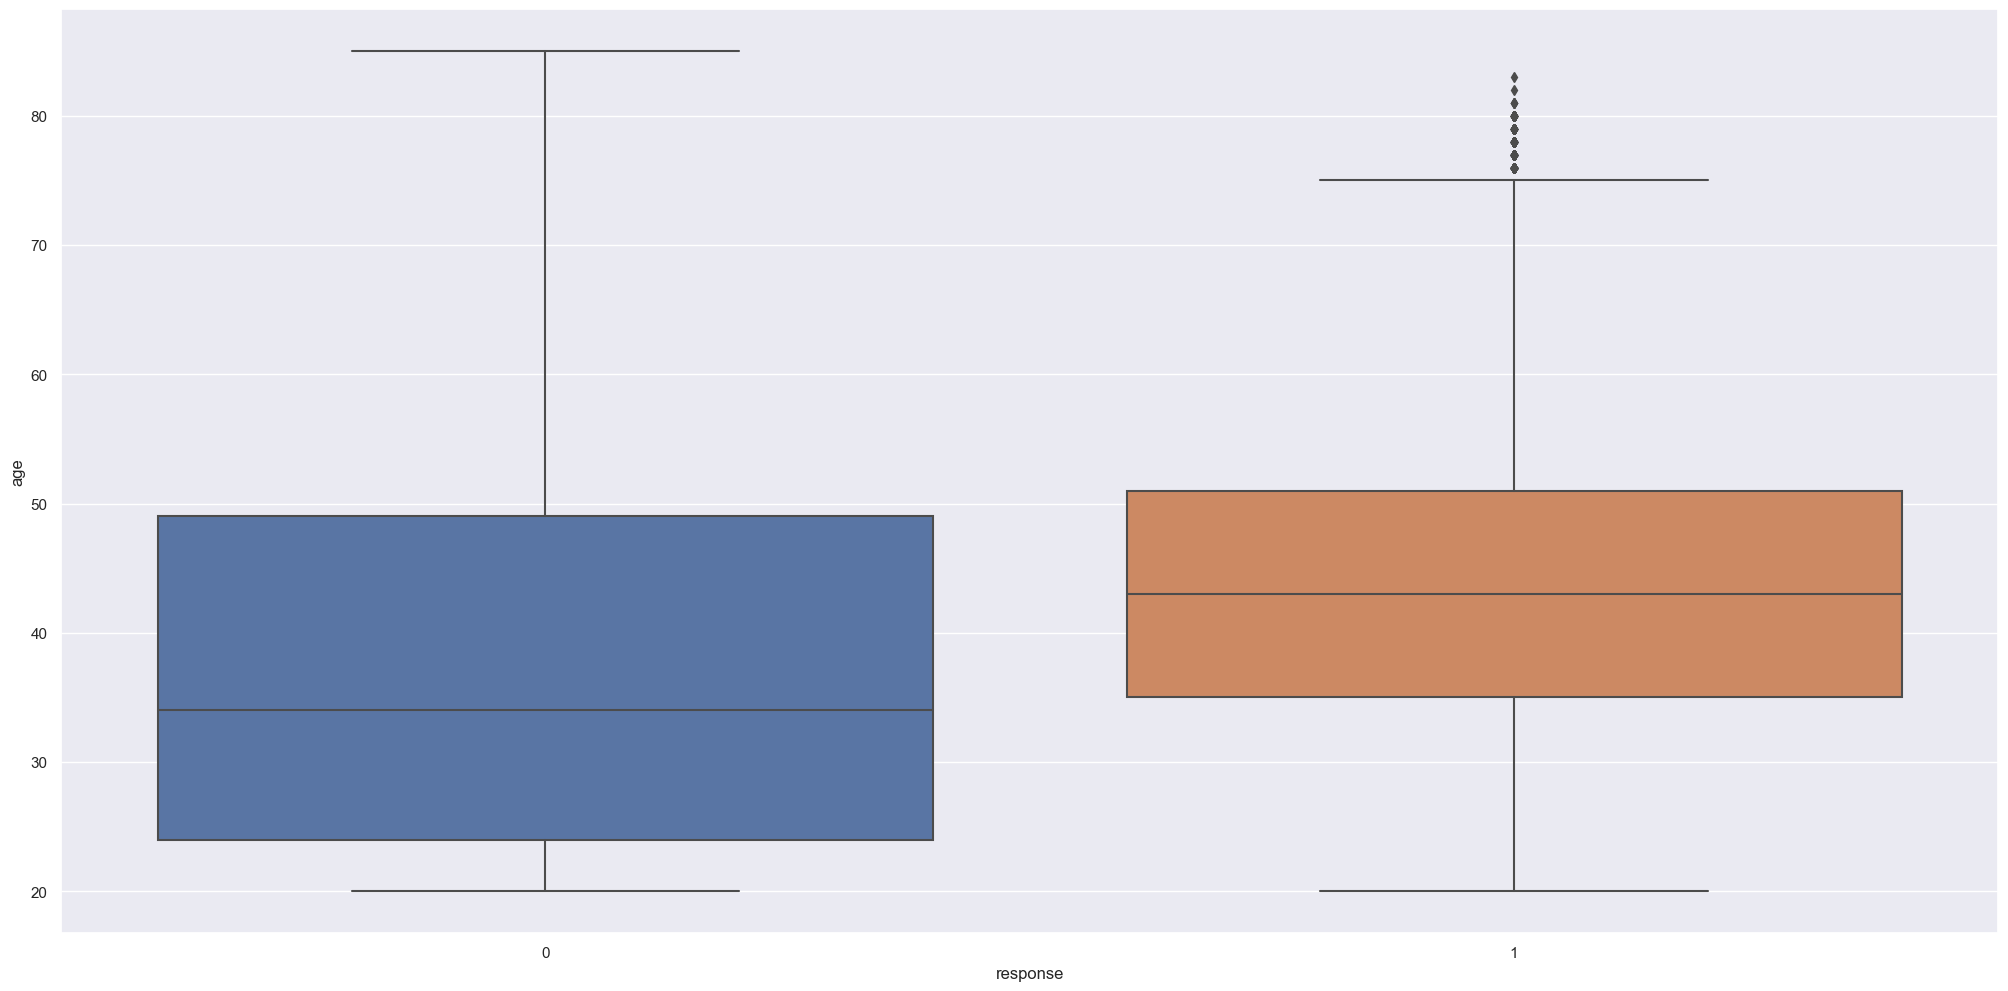

In [70]:
# age
sns.boxplot(x = 'response', y = 'age', data= df4)

<Axes: xlabel='age', ylabel='Count'>

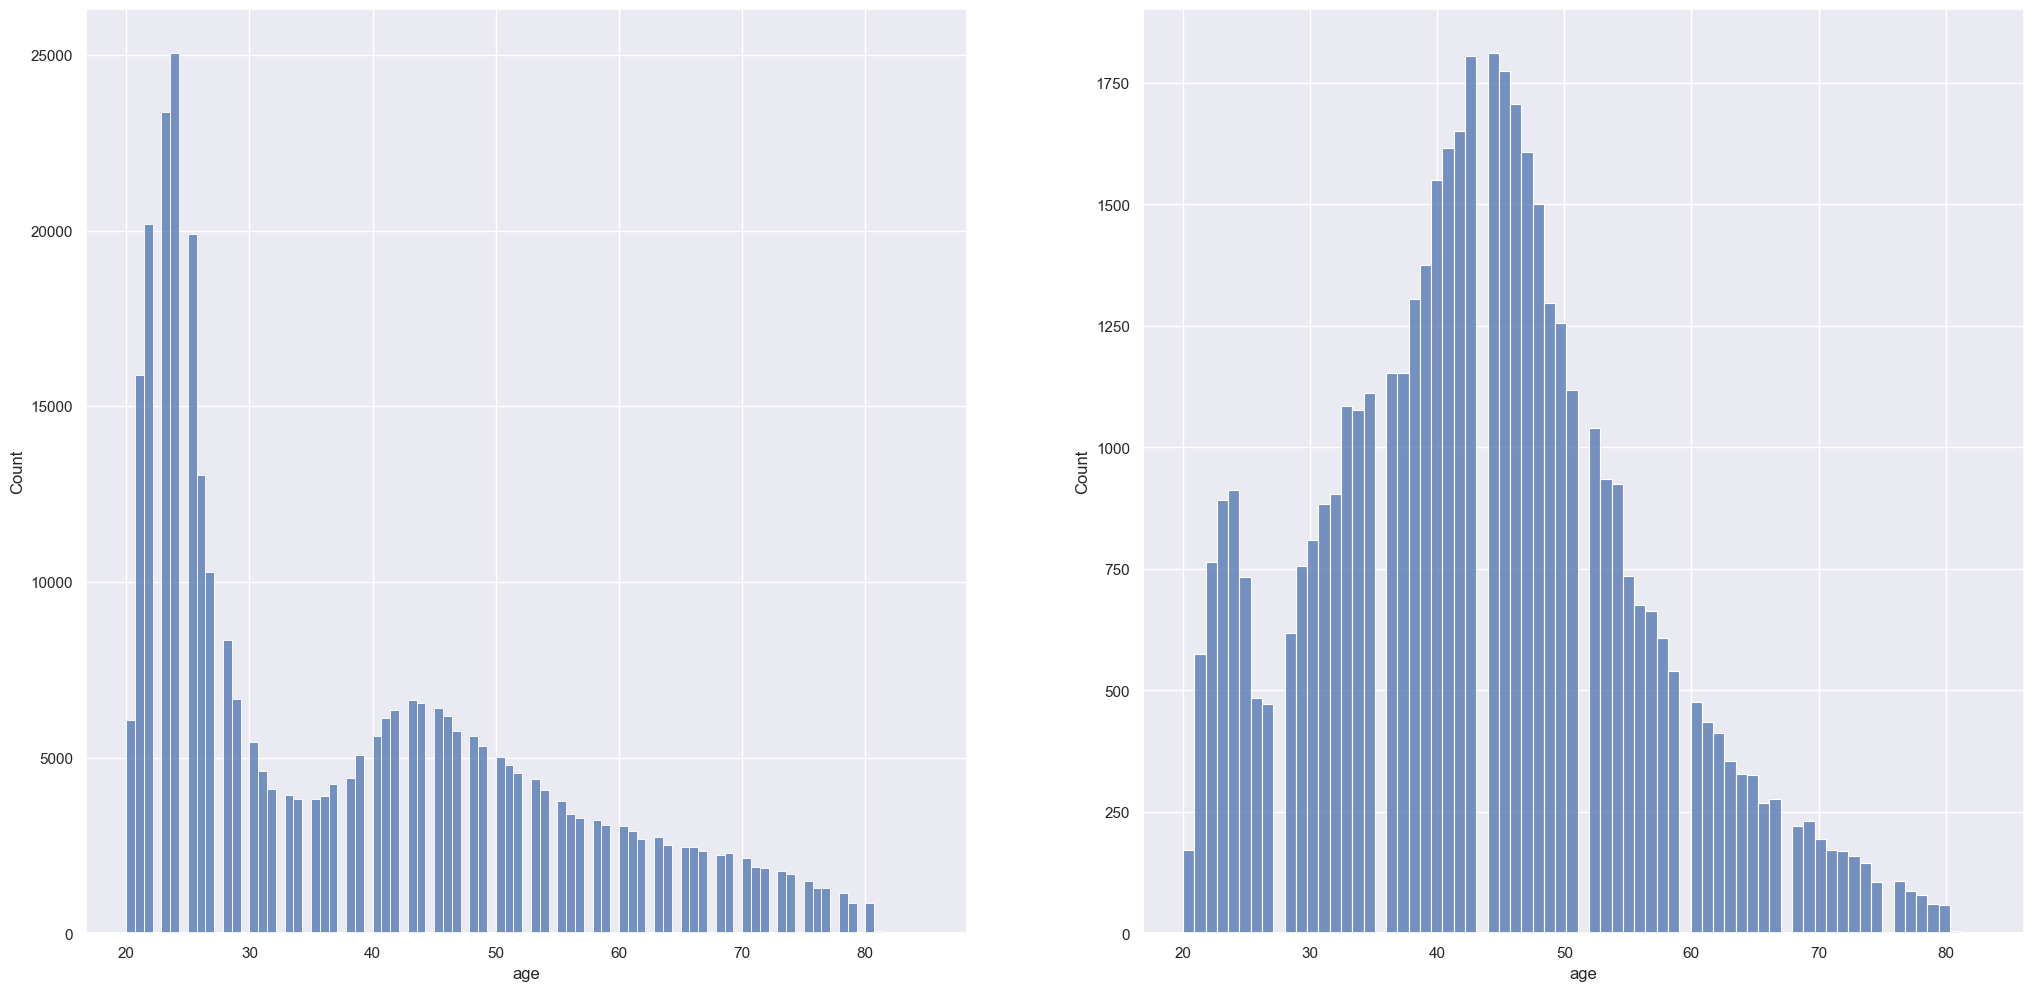

In [69]:
plt.subplot(1, 2, 1)

aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot(aux00)

plt.subplot(1, 2, 2)
aux00 = df4.loc[df4['response'] == 1, 'age']
sns.histplot(aux00)

In [73]:
df4['response'].value_counts()/len(df4)

0    0.877437
1    0.122563
Name: response, dtype: float64

<Axes: xlabel='response', ylabel='annual_premium'>

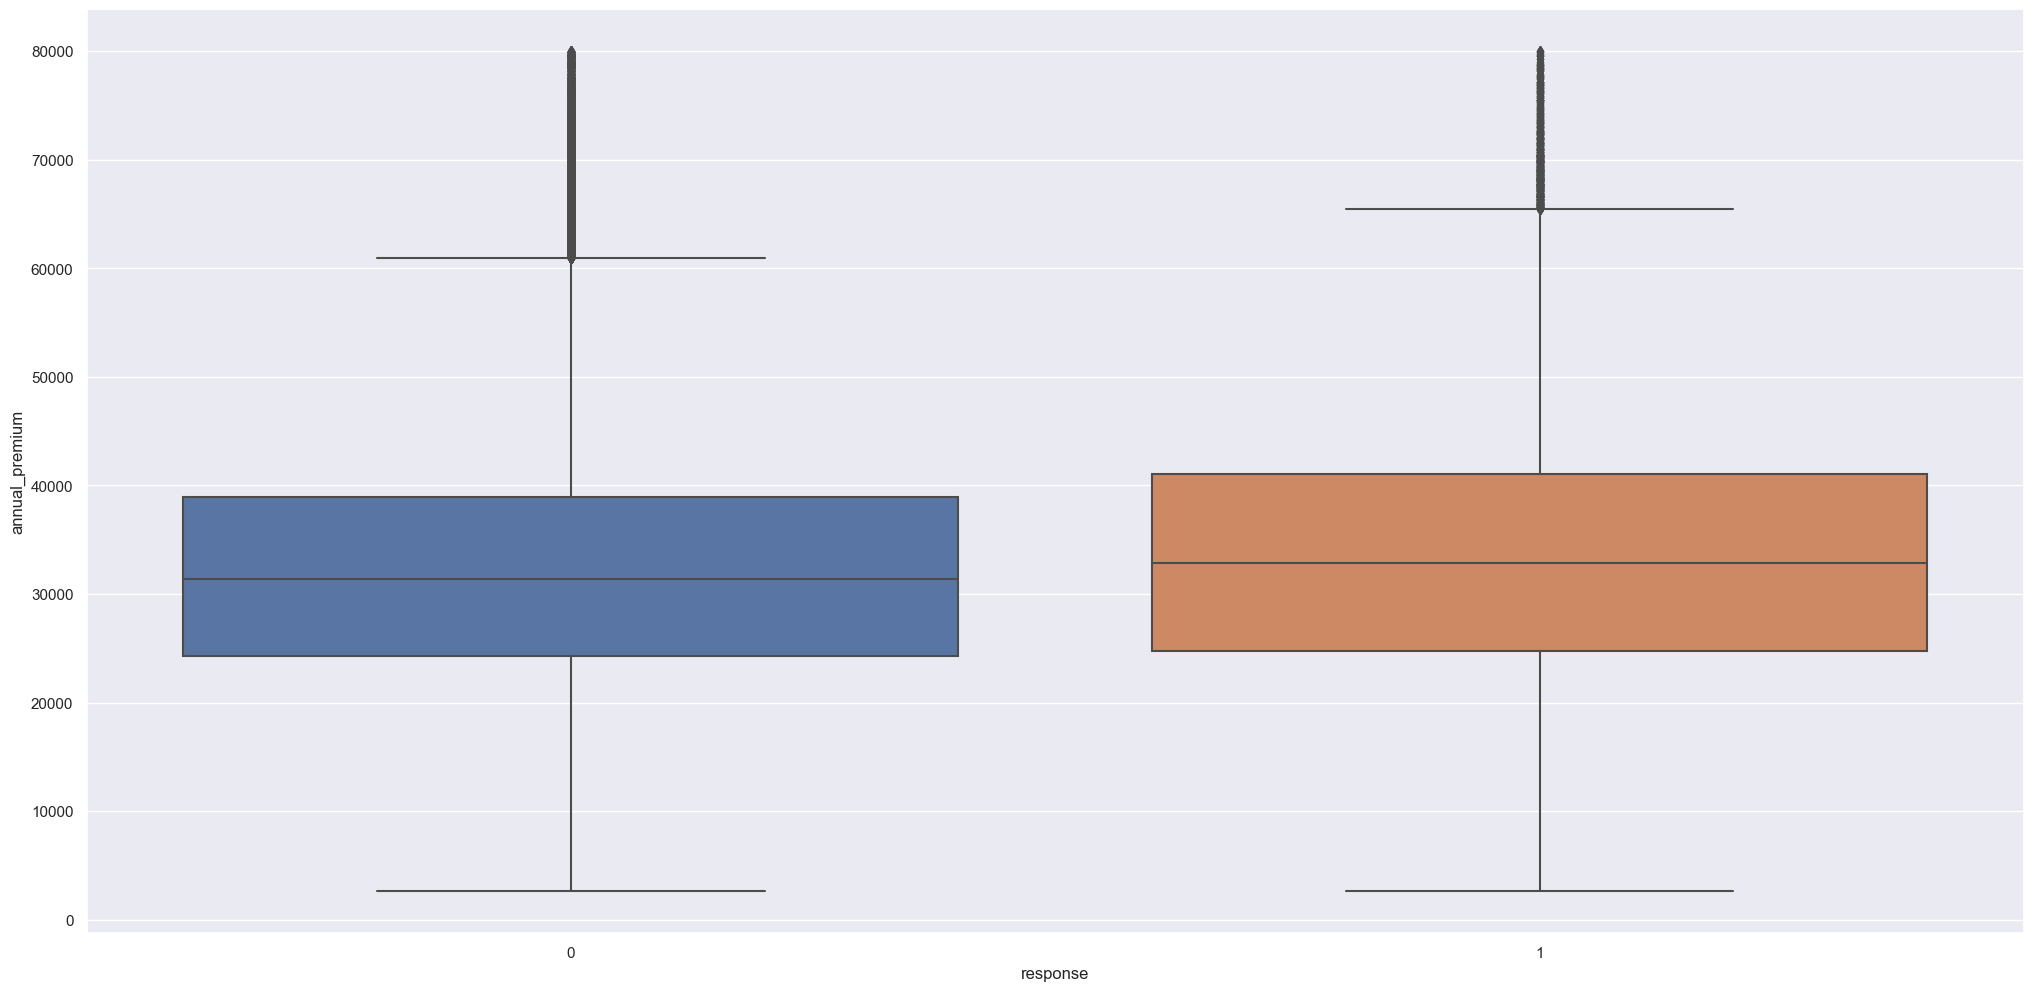

In [82]:
# Anual premium
aux = df4[df4['annual_premium'] < 80000] # because of outlier filtering annual premium
sns.boxplot(x = 'response', y = 'annual_premium', data = aux)



<Axes: xlabel='annual_premium', ylabel='Count'>

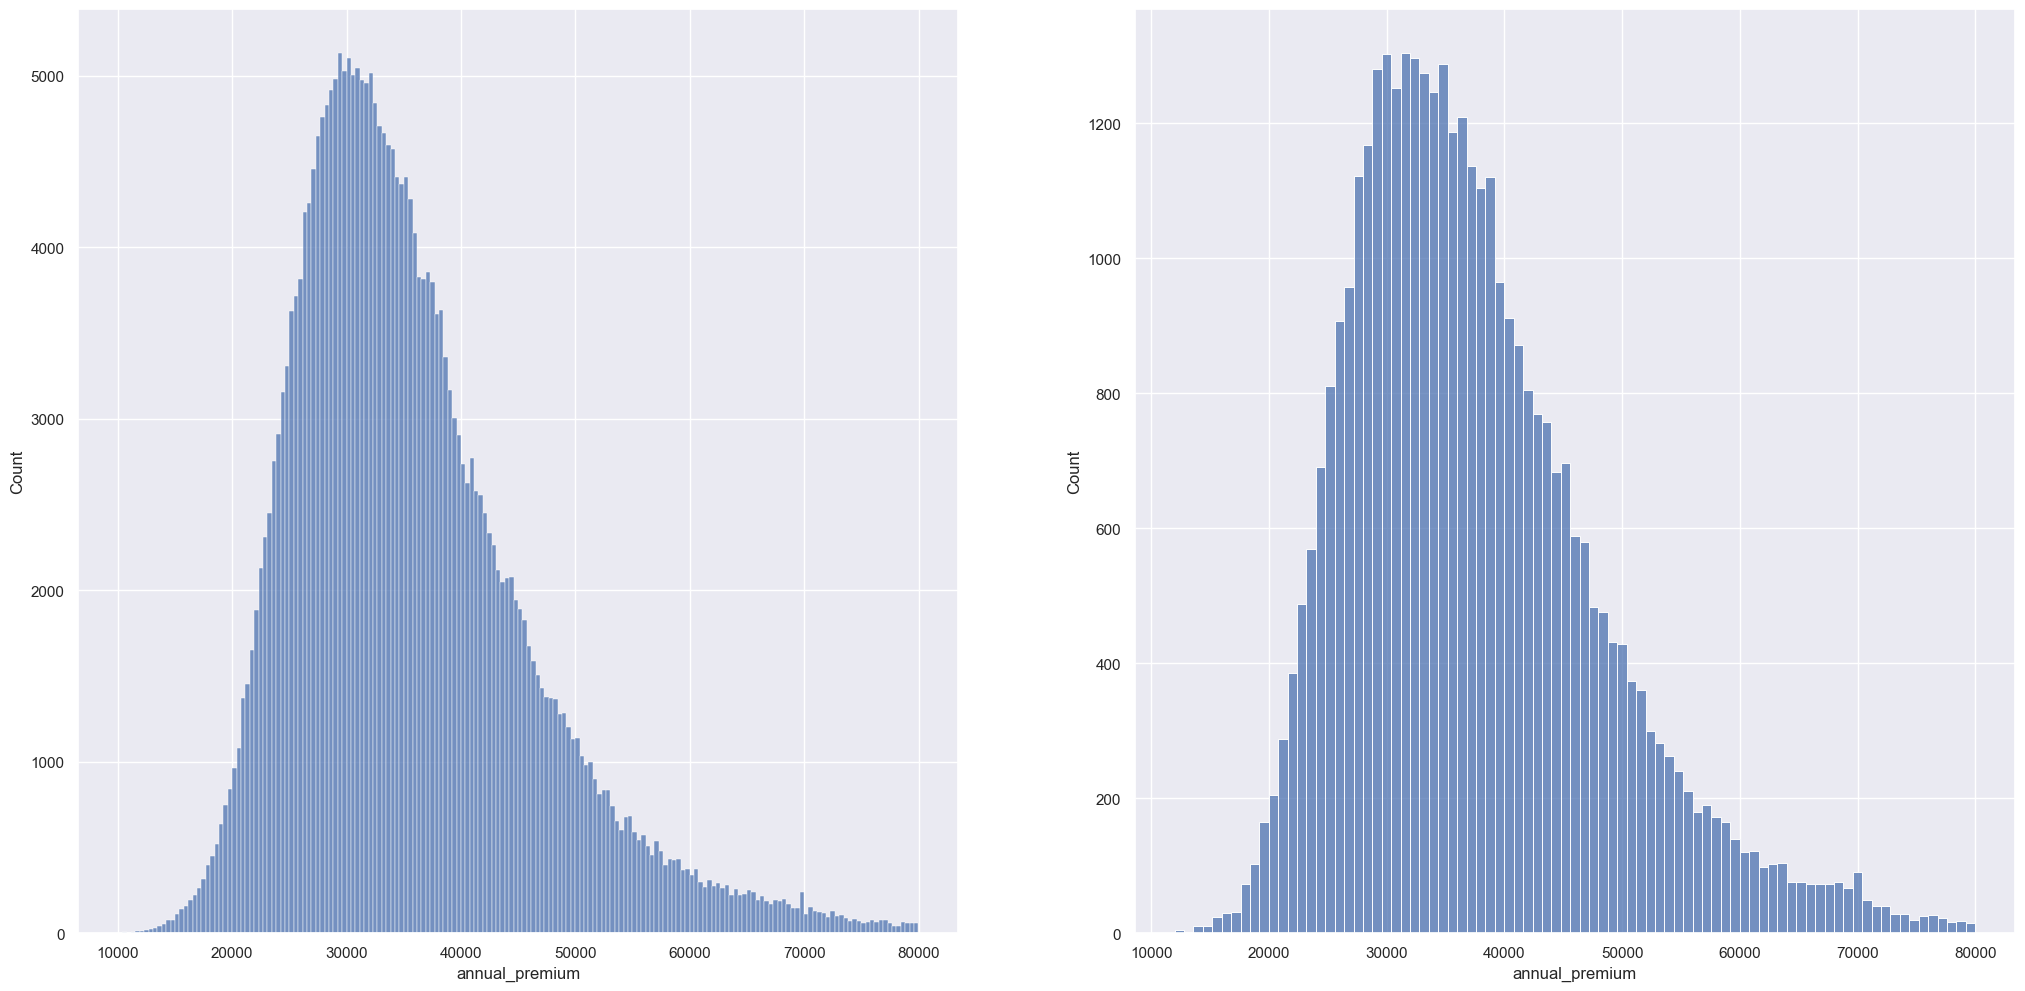

In [88]:
plt.subplot(1,2,1)
aux = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)] 
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
sns.histplot(aux00)

plt.subplot(1,2,2)
aux = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)] 
aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
sns.histplot(aux00)

In [100]:
# driving licence, contingency table 
df4[['driving_license', 'response']].value_counts().reset_index()


# aux = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
# sns.barplot(x = 'response', y='driving_license', data = aux )
# plt.legend()

,driving_license,response,0
0,1,0,333628
1,1,1,46669
2,0,0,771
3,0,1,41


<Axes: xlabel='region_code', ylabel='id'>

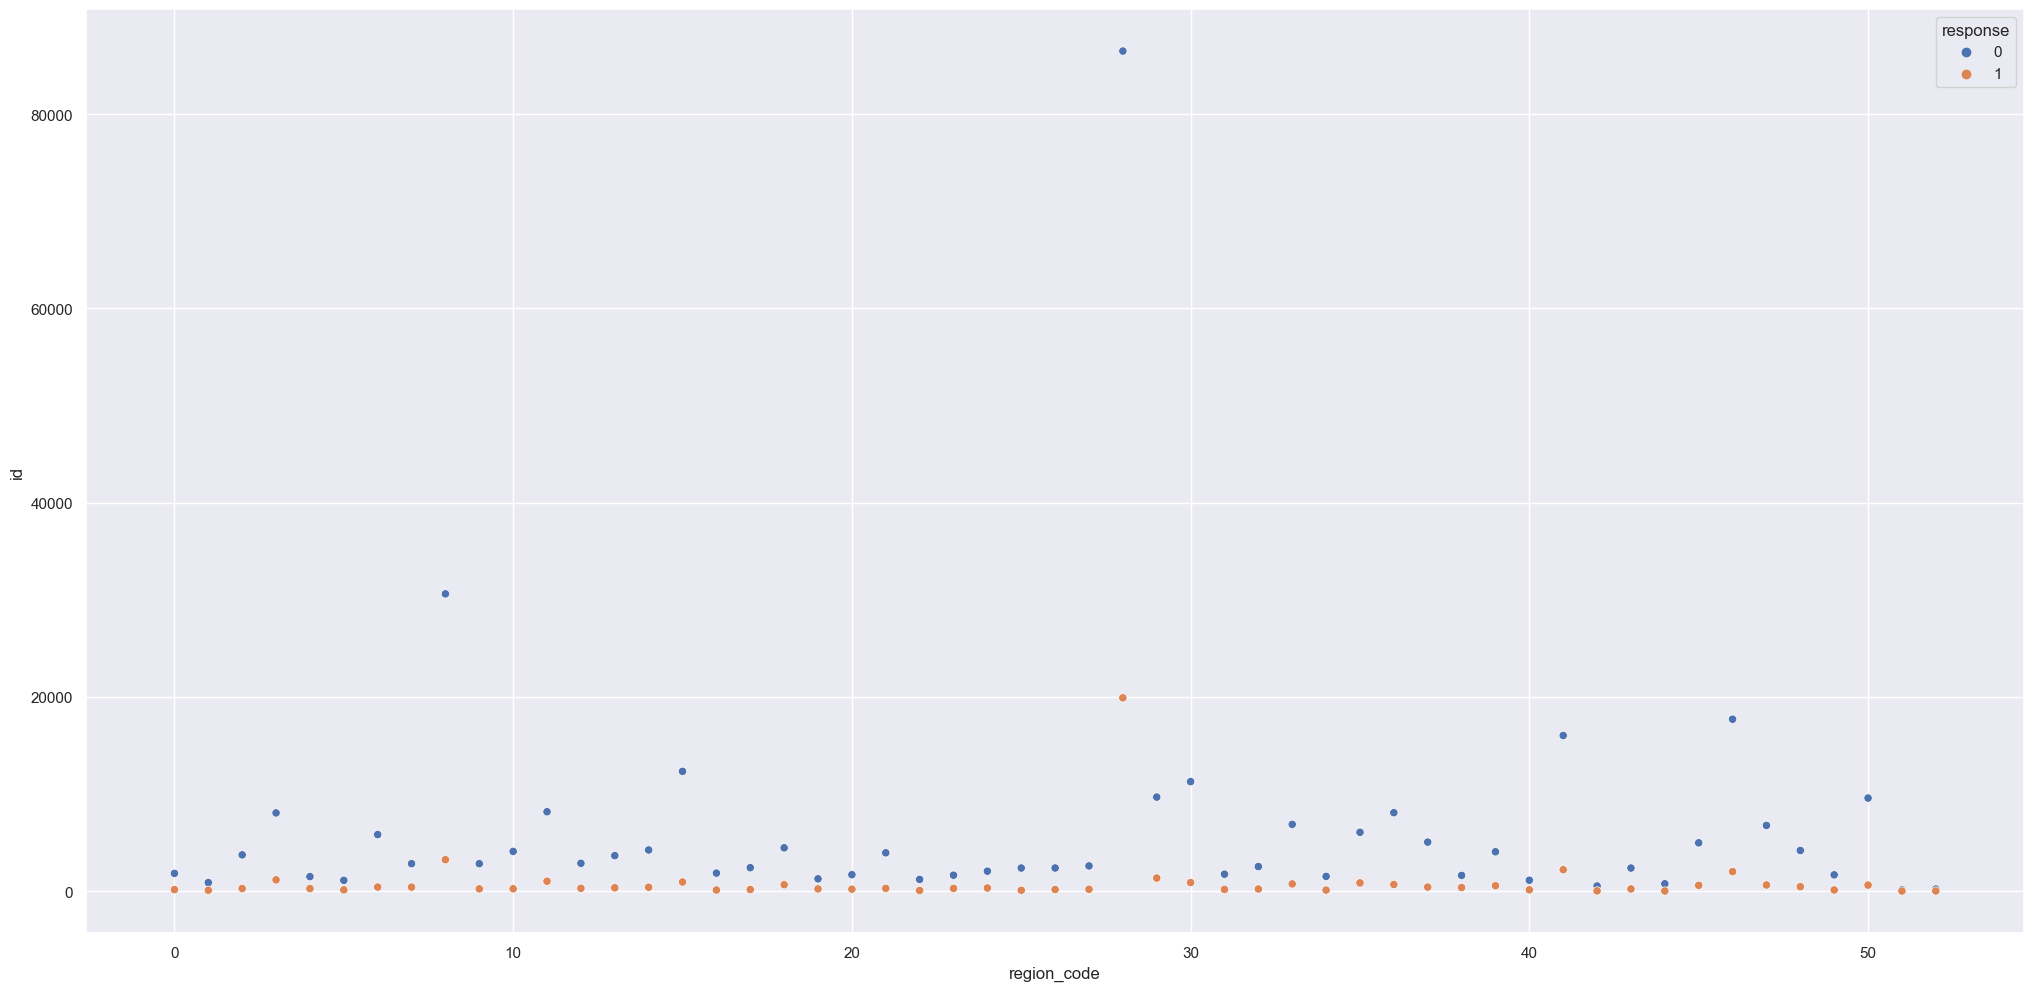

In [104]:
# regioncode

aux0 = df4[['id','region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()

sns.scatterplot(x = 'region_code', y = 'id', hue = 'response', data = aux0)


In [111]:
# previously insured

pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x/x.sum(), axis= 1)


response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [119]:
# vehicle age

df4[['vehicle_age', 'response']].value_counts(normalize = True).reset_index().sort_values(by='response')

,vehicle_age,response,0
0,between_1_2_year,0,0.434285
1,less_than_1_year,0,0.413488
3,over_2_years,0,0.029663
2,between_1_2_year,1,0.091328
4,less_than_1_year,1,0.018897
5,over_2_years,1,0.012338


In [125]:
df4.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

<Axes: xlabel='response', ylabel='policy_sales_channel'>

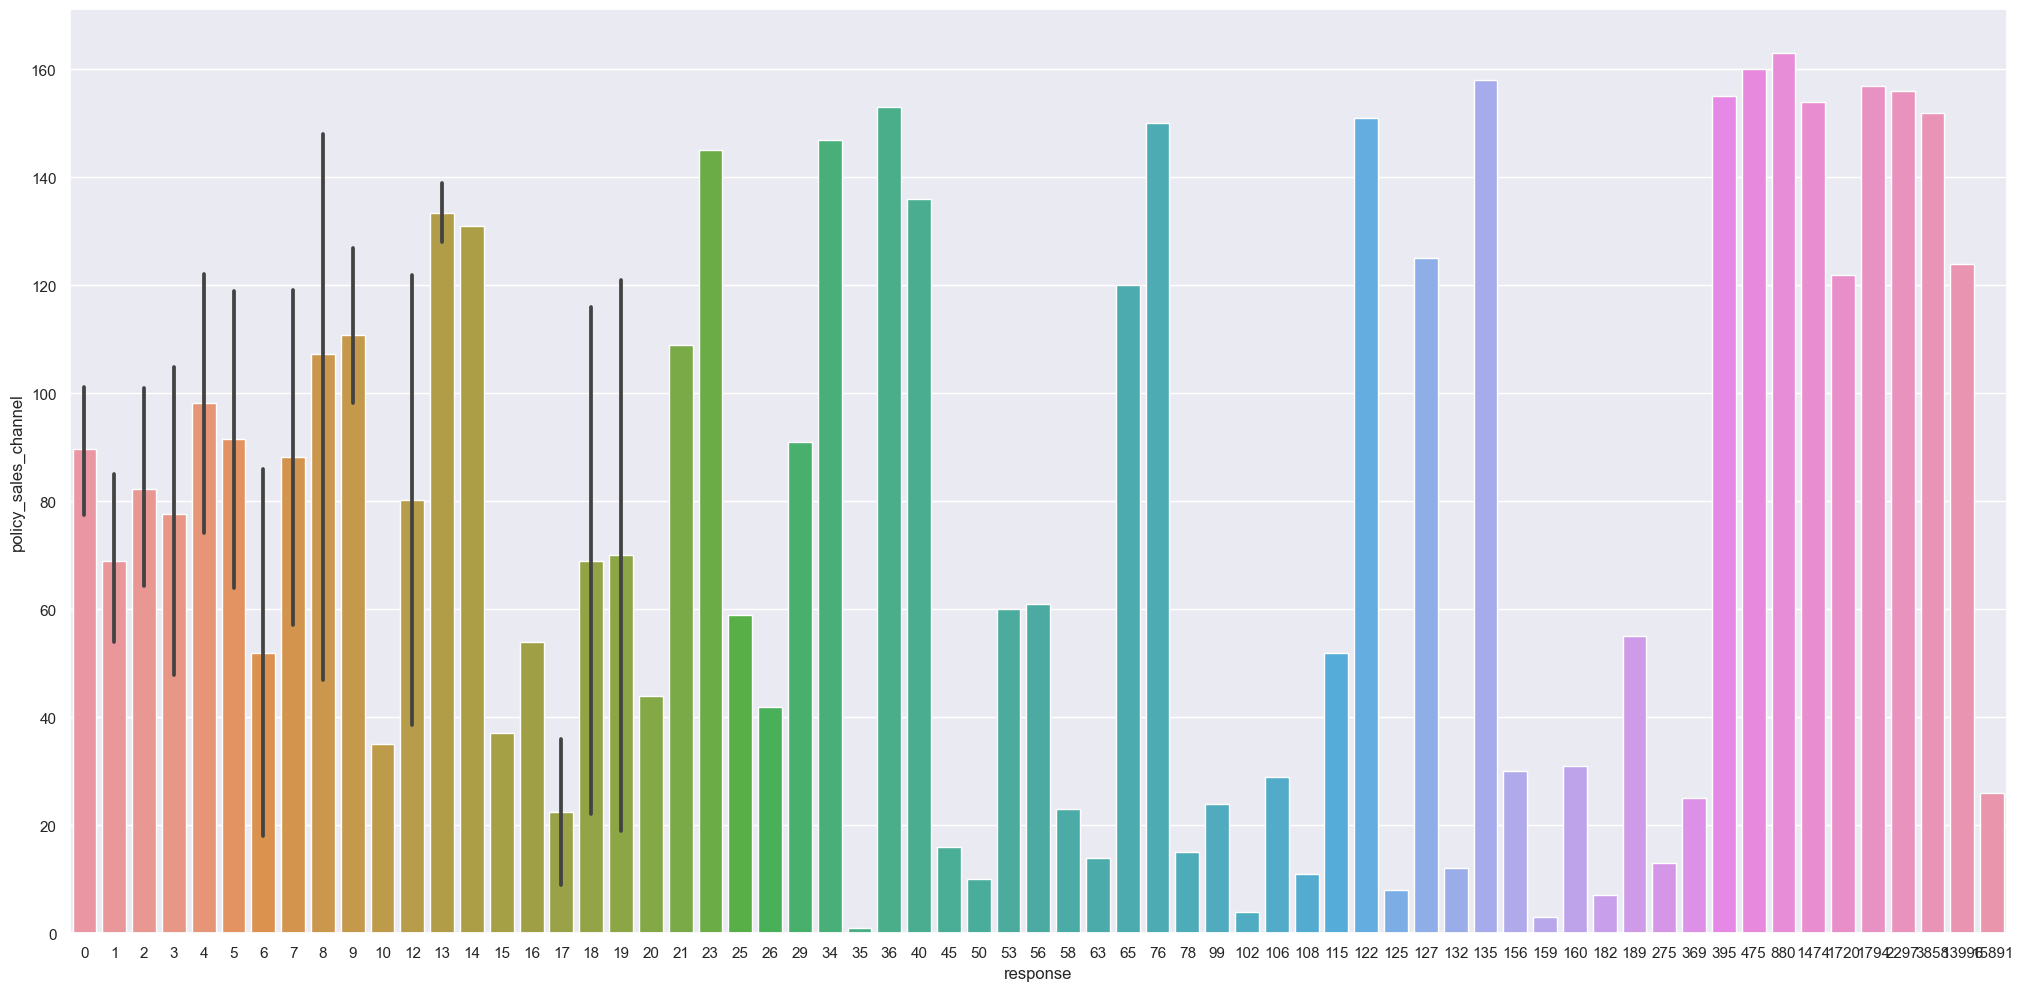

In [127]:
# policy_sales_channel

aux = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(x= 'response', y='policy_sales_channel', data = aux)

AttributeError: 'DataFrame' object has no attribute 'smoker'

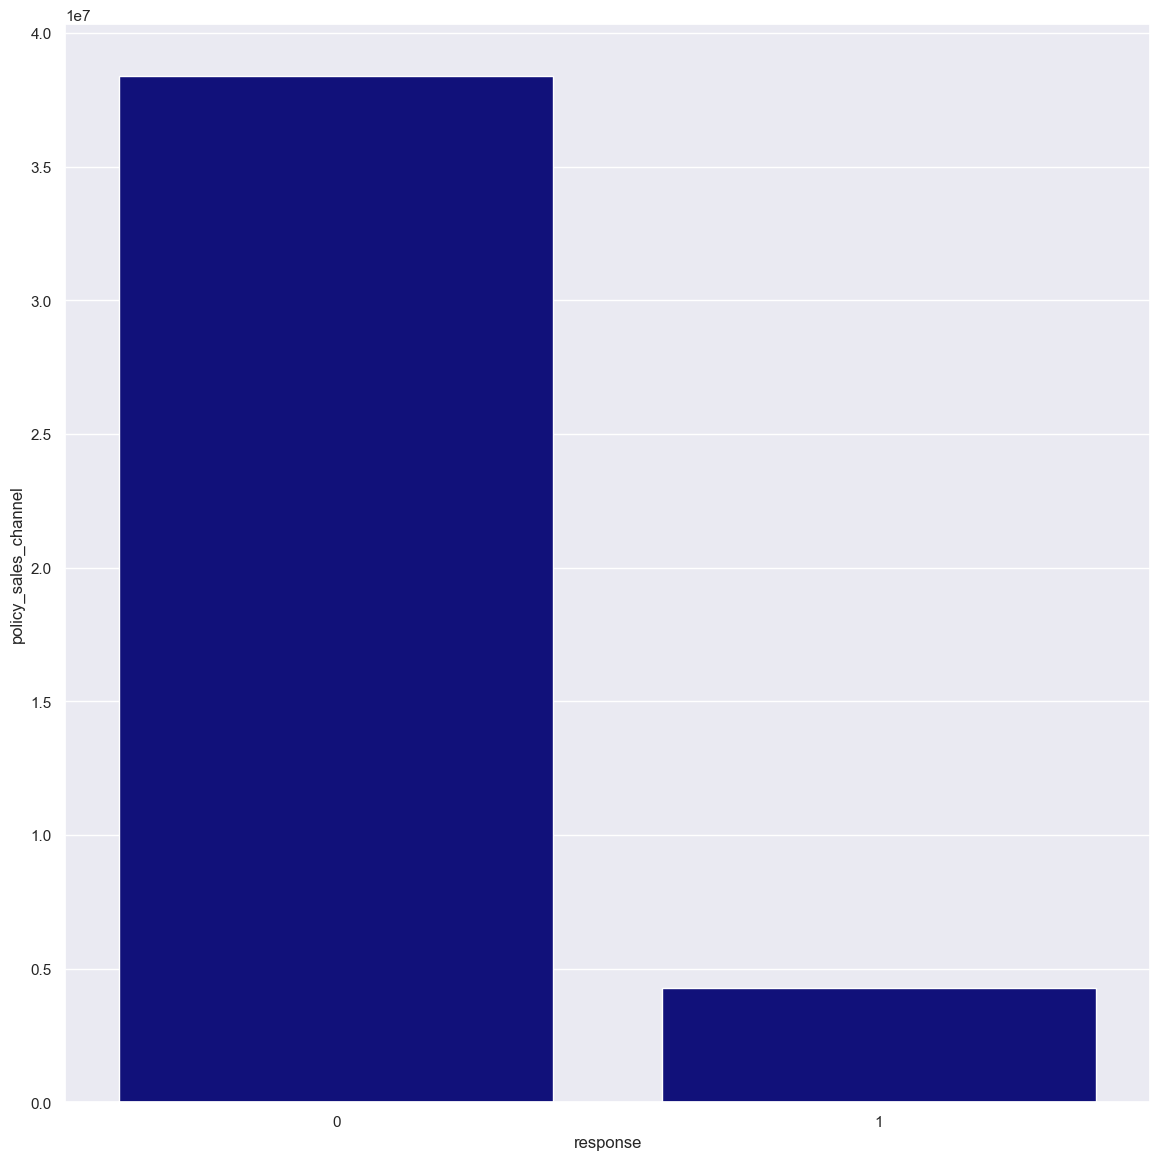

In [136]:
# from raw value to percentage

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 14))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = df4.groupby('response')['policy_sales_channel'].sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="response",  y="policy_sales_channel", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
smoker = df4[df4.smoker=='Yes']

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="response", y="policy_sales_channel", data=smoker, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])


# show the graph
plt.show()

# 6.0 Data preparation

# 5.0 Feature Selection

# 6.0 Data preparation

# 7.0 Machine Learning